<a href="https://colab.research.google.com/github/aguusandy/pdi-2024/blob/master/Unidad2a_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unidad 2.a Procesamiento Digital de Imagenes 2024
## Operaciones puntuales


In [ ]:
# imports
import cv2
import numpy as np
from matplotlib import pyplot as plt

# funcion que le paso al trackbar
def nothing(x):
  pass

## Ejercicio 1

Transformaciones lineales de una imagen
Conociendo la ecuacion general de una transformacion lineal:
s = ar + c
con r: valor de entrada, a: factor de ganancia y c: offset, realice los siguientes
ejercicios:
1. Implemente una LUT del mapeo entre la entrada y la salida.
2. Pruebe la rutina con diferentes juegos de coeficientes a y c, sobre diversas
imagenes, y muestre en una misma ventana la imagen original, el mapeo
aplicado y la imagen obtenida.
3. Implemente el negativo de la imagen de entrada.
4. Genere diversas LUT con estiramientos y compresiones lineales por tramos
de la entrada, y pruebe los resultados sobre diversas imagenes.


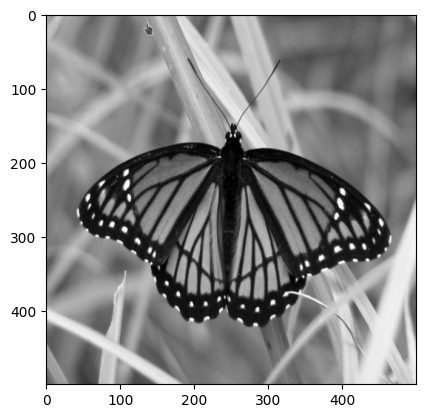

In [ ]:
# Ejercicio 1

# url de la image, si quiero cambiar de imagen cambio esta url
img_url = "mariposa02.png"
# leo la imagen en escala de grises
img_gray =  cv2.imread(img_url,cv2.IMREAD_GRAYSCALE)
img_gray = cv2.resize(img_gray, (500, 500))
plt.imshow(img_gray,cmap="gray")

In [ ]:
# Función para crear una LUT
# si quiero usar el negativo de la funcion le paso el neg = 1
def make_lut(a,c,neg):
    lut = np.zeros(256, dtype=np.uint8)
    if neg == 0:
      for i in range(256):
        # aplico el clip, para que no se vaya de [0,255]
        lut[i] = np.clip(int(a*i + c), 0, 255)
    else:
       for i in range(256):
        # aplico el clip, para que no se vaya de [0,255]
        lut[i] = np.clip(int((-1)*i + 255), 0, 255)
    return lut


In [ ]:
# Función para crear una LUT por tamos
# tengo que pasar como parametros:
# tramos: vector que representa donde empieza y termina cada tramo
# a y c son vectores con el mismo tamaño que v, donde cada a,c[i] corresponde a cada tramo
def make_lut_tramos(a,c,tramos):
    iteraciones = len(tramos)
    lut = np.zeros(256, dtype=np.uint8)
    for i in range(iteraciones):
        # aplico el clip, para que no se vaya de [0,255]
        tramo = tramos[i]
        lut[ tramo ] = np.clip( (a[i]*tramo + c[i]).astype('int') , 0, 255)
    return lut

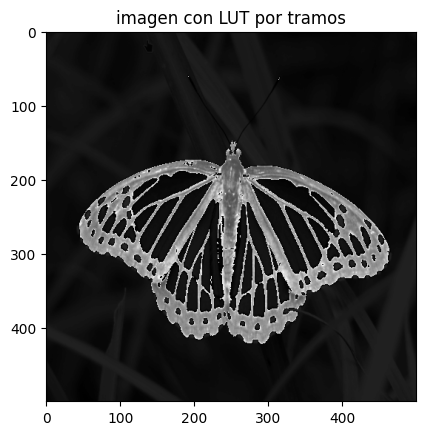

In [ ]:
# armo vectores por tramos
# se podria hacer mas interactivo, pedir por consola la cantidad de tramos, el inicio de cada uno, etc
tramos_v = [np.arange(0,50),np.arange(50,256)]
a_v = [2,0.1]
c_v = [50,0]

# cv2.namedWindow('lut aplicado por tramos',cv2.WINDOW_NORMAL)
lut = make_lut_tramos(a_v,c_v,tramos_v)
img_gray_2 = cv2.LUT(img_gray, lut)

plt.title('imagen con LUT por tramos')
plt.imshow(img_gray_2, cmap='gray')
plt.show()

In [ ]:
cv2.namedWindow('original',cv2.WINDOW_NORMAL)
cv2.imshow('original',img_gray)

# creo la ventana donde muestro la imagen modificada
cv2.namedWindow('lut aplicado',cv2.WINDOW_NORMAL)
# creo las barras para a y para c
cv2.createTrackbar("a",'lut aplicado', 1, 10, nothing)
cv2.createTrackbar("c",'lut aplicado', 0, 255, nothing)
cv2.createTrackbar("negativo",'lut aplicado', 0, 1, nothing)

while True:
  # obtengo los valores de a y c
  a = cv2.getTrackbarPos('a','lut aplicado')
  c = cv2.getTrackbarPos('c','lut aplicado')
  negativo = cv2.getTrackbarPos('negativo','lut aplicado')

  lut = make_lut(a,c,negativo)

  img_gray_2 = cv2.LUT(img_gray, lut)
  cv2.imshow('lut aplicado',img_gray_2)

  key = cv2.waitKey(1)
  # presione c para salir
  if key == ord("c"):
    break

cv2.destroyAllWindows()

## Ejercicio 2:
Transformaciones no lineales
1. Implemente la transformacion logarıtmica s = log(1 + r) y la transformacion de potencia s = r^(γ)  (c=1).
2. Realice el procesado sobre la imagen ’rmn.jpg’, utilizando los dos procesos
por separado.

Text(0.5, 1.0, 'trans_logaritmica')

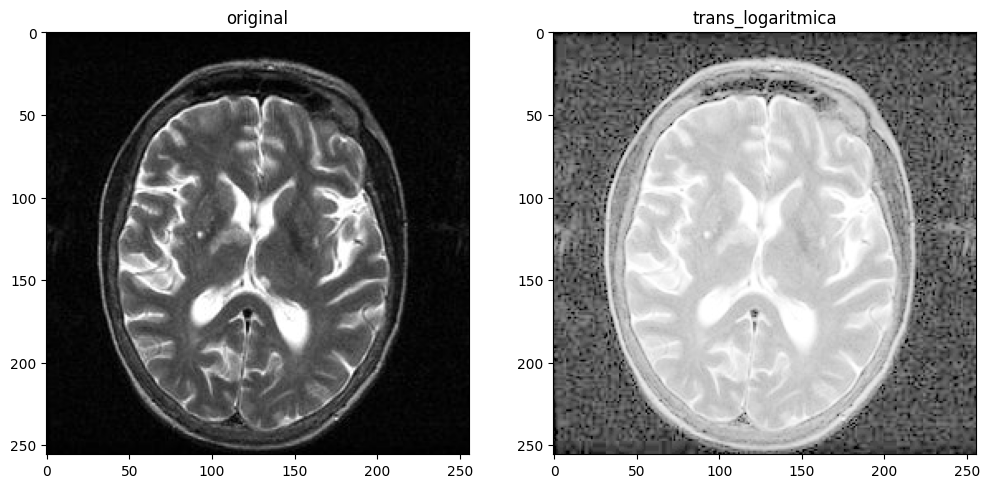

In [ ]:
#Ejercicio 2

# Aplicar la transformación logarítmica
imagen_original1 = cv2.imread('rmn.jpg', cv2.IMREAD_GRAYSCALE)
c1 = 1
img_transformada =  transformacion_logaritmica(imagen_original1,c1)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,12))
ax[0].imshow(imagen_original1,cmap='gray')
ax[0].set_title("original")
ax[1].imshow(img_transformada,cmap='gray')
ax[1].set_title("trans_logaritmica")

In [ ]:
def transformacion_logaritmica(imagen_original,c):
  img_transformada = c*np.log1p(imagen_original.astype(np.float32))
  # normalizamos
  return (255 * img_transformada / np.max(img_transformada)).astype(np.uint8)

In [ ]:
def transformacion_exponencial(imagen_original,c,alpha):
  img_transformada = c*np.power(imagen_original/255.0,alpha)
  # normalizamos
  return (255 * img_transformada / np.max(img_transformada)).astype(np.uint8)

Text(0.5, 1.0, 'trans_exponencial')

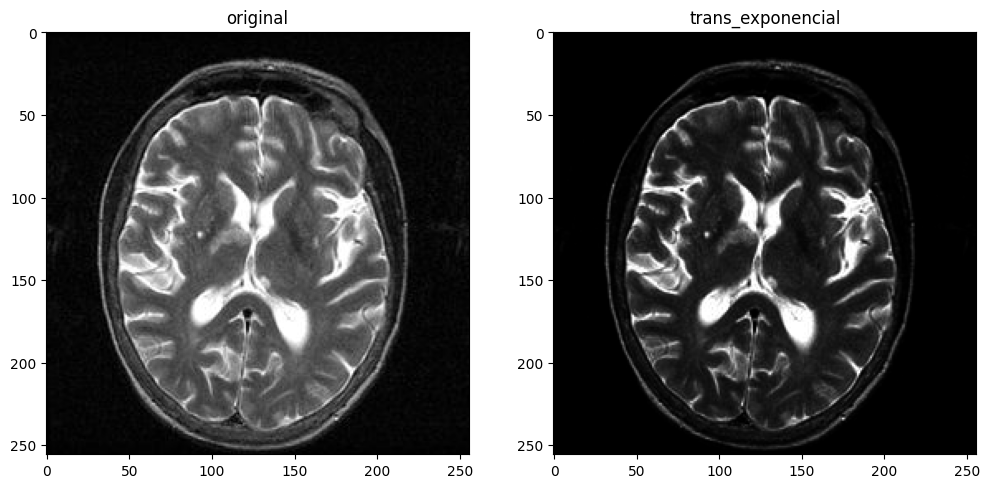

In [ ]:
imagen_original2 = cv2.imread('rmn.jpg', cv2.IMREAD_GRAYSCALE)
c2 = 1
alpha = 2
img_transformada = transformacion_exponencial(imagen_original2,c2,alpha)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,12))
ax[0].imshow(imagen_original1,cmap='gray')
ax[0].set_title("original")
ax[1].imshow(img_transformada,cmap='gray')
ax[1].set_title("trans_exponencial")

##Ejercicio 3:
Operaciones aritmeticas
1. Implemente una funcion que realice las siguientes operaciones aritmeticas
sobre dos imagenes que sean pasadas como parametros:

    a) Suma. Normalice el resultado por el numero de imagenes.
  
    b) Diferencia. Aplique las dos funciones de reescalado usadas tıpicamente
para evitar el desborde de rango (sumar 255 y dividir por 2, o restar el
mınimo y escalar a 255).
  
    c) Multiplicacion. En esta operacion la segunda imagen debera ser una
mascara binaria, muy utilizada para la extraccion de la region de interes
(ROI) de una imagen.

2. A partir de un video (pedestrians.mp4) de una camara de seguridad, debe
obtener solamente el fondo de la imagen. Incorpore un elemento TrackBar
que le permita ir eligiendo el numero de frames a promediar para observar
los resultados instantaneamente.

```
import numpy as np
import cv2
cap = cv2.VideoCapture(‘‘pedestrians.mp4’’)
while(cap.isOpened()):
   ret, frame = cap.read()
```



In [ ]:
# ------------------------------ EJERCICIO 3.1 ----------------------------------------

In [ ]:
print(np.arange(0,3))

[0 1 2]


In [ ]:
# url de la image, si quiero cambiar de imagen cambio esta url
img_url1 = "mariposa02.png"
img_url2 = "s05_i08_H_LB.png"
# leo las imagenes en escala de grises
img_gray1 =  cv2.imread(img_url1,cv2.IMREAD_GRAYSCALE)
img_gray1 = cv2.resize(img_gray1, (600, 400))

img_gray2 =  cv2.imread(img_url2,cv2.IMREAD_GRAYSCALE)
img_gray2 = cv2.resize(img_gray2, (600, 400))

In [ ]:
def suma_imagenes(alfa,img1,img2):
    # img_salida = ((1-alfa)*img1 + alfa*img2)/2 -> normalizo la salida entre 2
    img_salida = ( (1-alfa)*img1 + alfa*img2 )*0.5
    # devuelvo la salida como uint8 -> mantengo los valores entre [0,255]
    return np.clip( img_salida.astype(np.uint8) , 0, 255)

In [ ]:
def diferencia_imagenes(dif,img1,img2):
    img_salida = img1 - img2
    # metodo 1 -> sumar 255 y dividir por 2
    if dif == 0:
        img_salida = ( (img_salida + 255)*0.5 ).astype(np.uint8)
    # metodo 2 -> restar el mınimo y escalar a 255
    else:
        img_salida = np.clip( (img_salida - np.min(img_salida) ).astype(np.uint8) , 0, 255)
    return img_salida

In [ ]:
def multiplicacion_imagen(img,mask):
    roi = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            roi[i,j] = img[i,j]*mask[i,j]
            # roi[i,j] = np.clip( roi[i,j].astype(np.uint8) , 0, 255)
    return roi/255

In [ ]:
# SUMA DE IMAGENES
cv2.namedWindow('suma_imagenes',cv2.WINDOW_AUTOSIZE)
# creo las barras para a y para c
cv2.createTrackbar('alfa','suma_imagenes', 1, 100, nothing)

while True:
    # obtengo los valores de a y c
    alfa = cv2.getTrackbarPos('alfa','suma_imagenes')/100
    # obtengo la suma de imagenes
    img_suma = suma_imagenes(alfa,img_gray1,img_gray2)
    # muestro en la ventana
    cv2.imshow('suma_imagenes',img_suma)

    key = cv2.waitKey(1)
    if key == ord("c"):
        break

cv2.destroyAllWindows()

In [ ]:
# DIFERENCIA DE IMAGENES
cv2.namedWindow('dif_imagenes',cv2.WINDOW_AUTOSIZE)

cv2.createTrackbar('dif','dif_imagenes', 0, 1, nothing)

while True:
    # obtengo los valores de a y c
    dif = cv2.getTrackbarPos('dif','dif_imagenes')
    # obtengo la suma de imagenes
    img_dif = diferencia_imagenes(dif,img_gray1,img_gray2)
    # muestro en la ventana
    cv2.imshow('dif_imagenes',img_dif)

    key = cv2.waitKey(1)
    if key == ord("c"):
        break

cv2.destroyAllWindows()

In [ ]:
# MULTIPLICACION DE IMAGENES
cv2.namedWindow('mul_imagenes',cv2.WINDOW_AUTOSIZE)
# creo las barras para a y para c
cv2.createTrackbar('imagen','mul_imagenes', 0, 1, nothing)

mask = np.zeros(img_gray1.shape).astype(np.uint8)
mask[100:300,200:400] = 1

while True:
    imagen = cv2.getTrackbarPos('imagen','mul_imagenes')
    if imagen == 0:
        roi = multiplicacion_imagen(img_gray1,mask)
    else:
        roi = multiplicacion_imagen(img_gray2,mask)

    # muestro en la ventana
    cv2.imshow('mul_imagenes',roi)
    key = cv2.waitKey(1)
    # presione c para salir
    if key == ord("c"):
        break

cv2.destroyAllWindows()

In [ ]:
# ------------------------------ EJERCICIO 3.2 ----------------------------------------

In [ ]:
#ejercicoi 3 -1
def promedio_imagenes(imagenes):
  if len(imagenes) !=0:
    cantidad_imagenes = len(imagenes)
    for i in range(cantidad_imagenes-1):
    #Verificar si las dimensiones de las imágenes son iguales
      if imagenes[i].shape != imagenes[i+1].shape:
        raise ValueError("Las dimensiones de las imágenes deben ser iguales")
    #sumar las imágenes
    suma= 0
    for i in range(cantidad_imagenes):
      suma += imagenes[i].astype(np.float32)

    promedio = suma/cantidad_imagenes
    return np.clip(promedio, 0, 255).astype(np.uint8)

In [ ]:
import numpy as np
import cv2
cap = cv2.VideoCapture("pedestrians.mp4")
fotogramas = []
cont = 0
while(cap.isOpened()):
   ret, frame = cap.read()
   fotogramas.append(frame)
   if not ret:
        print("Llegaste al último fotograma del video.")
        break

cv2.namedWindow('fondo',cv2.WINDOW_AUTOSIZE)
# creo las barras para a y para c
cv2.createTrackbar('imagen','fondo', 1, 100, nothing)

while True:
    cantidad_promediada = cv2.getTrackbarPos('imagen','fondo')
    fondo = promedio_imagenes(fotogramas[0:cantidad_promediada])
    # muestro en la ventana
    cv2.imshow('fondo',fondo)

    key = cv2.waitKey(1)
    # presione c para salir
    if key == ord("c"):
        break

cv2.destroyAllWindows()


Llegaste al último fotograma del video.


## Ejercicio 4: Trabajos de aplicaci´on
1. Utilizando las tecnicas aprendidas, descubra que objetos no estan perceptibles
en la imagen earth.bmp y realce la imagen de forma que los objetos se vuelvan
visibles con buen contraste sin realizar modificaciones sustanciales en el resto
de la imagen.

2. Al final del proceso de manufactura de placas madres, de marca ASUS modelo
A7V600, se obtienen dos clases de producto final: A7V600-x y A7V600-SE.
Implemente un algoritmo, que a partir de una imagen, determine que tipo de
placa es. Haga uso de las tecnicas de realce apendidas y utilice las imagenes
a7v600-x.gif y a7v600-SE.gif. Adapte el metodo de forma que contemple el
reconocimiento de imagenes que han sido afectadas por un ruido aleatorio
impulsivo (a7v600-x(RImpulsivo).gif y a7v600-SE(RImpulsivo).gif ).

3. En una fabrica de medicamentos se desea implementar un sistema para la
inspeccion visual automatica de blisters en la lınea de empaquetado. La adquisicion de la imagen se realiza en escala de grises mediante una camara
CCD fija y bajo condiciones controladas de iluminacion, escala y enfoque. El
objetivo consiste en determinar en cada instante si el blister que esta siendo analizado se encuentra incompleto, en cuyo caso la region correspondiente a la pıldora faltante presenta una intensidad similar al fondo. Escriba una funcion que reciba como parametro la imagen del blister a analizar y devuelva un mensaje indicando si el mismo contiene o no la totalidad de las pıldoras. En caso de estar incompleto, indique la posicion (x,y) de las pıldoras faltantes. Verifique el funcionamiento con las imagenes blister completo.jpg y blister incompleto.jpg.

4. (opcional) Implemente una funcion que permita “esconder” una imagen binaria en una imagen de grises sin que esto sea percibido a simple vista. Luego,
implemente una funcion que permita extraer la imagen binaria. Analice su
desempeno. [Utilice rodajas del plano de bits]


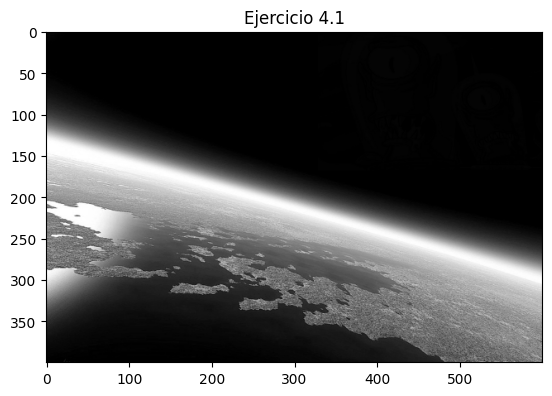

In [ ]:
# EJERCICIO 4.1

img_4_1 = cv2.imread("earth.bmp",cv2.IMREAD_GRAYSCALE)
img_4_1 = cv2.resize(img_4_1, (600, 400))
plt.title('Ejercicio 4.1')
plt.imshow(img_4_1, cmap='gray')
plt.show()

In [ ]:
cv2.namedWindow('ej_4_1',cv2.WINDOW_AUTOSIZE)
# creo las barras para a y para c# creo las barras para a y para c
cv2.createTrackbar("a",'ej_4_1', 1, 10, nothing)
cv2.createTrackbar("c",'ej_4_1', 0, 255, nothing)
cv2.createTrackbar("tramo",'ej_4_1', 0, 255, nothing)
# con a = 10, c=15, tramo=5 se llega a ver bien

while True:
    a = cv2.getTrackbarPos('a','ej_4_1')
    c = cv2.getTrackbarPos('c','ej_4_1')
    tramo = cv2.getTrackbarPos('tramo','ej_4_1')

    # armo vectores por tramos
    # se podria hacer mas interactivo, pedir por consola la cantidad de tramos, el inicio de cada uno, etc
    tramos_v = [np.arange(0,tramo),np.arange(tramo,256)]
    a_v = [a,1]
    c_v = [c,0]

    lut = make_lut_tramos(a_v,c_v,tramos_v)
    img_4_1_realzada = cv2.LUT(img_4_1, lut)

    cv2.imshow('ej_4_1',img_4_1_realzada)
    key = cv2.waitKey(1)
    # presione c para salir
    if key == ord("c"):
        break

cv2.destroyAllWindows()

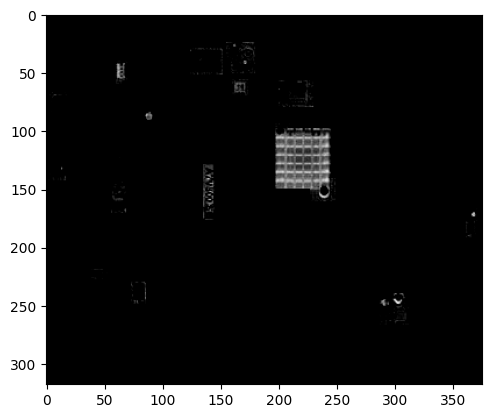

In [ ]:
# EJRCICIO 4.2
# Primero usamos la resta para darnos cuenta que lugares son los mas diferenciables entre ambas placas
placa_SE = plt.imread("a7v600-SE.gif",cv2.IMREAD_GRAYSCALE)
placa_X = plt.imread("a7v600-X.gif",cv2.IMREAD_GRAYSCALE)
placa_SE_ruido = plt.imread("a7v600-SE(RImpulsivo).gif",cv2.IMREAD_GRAYSCALE)
placa_X_ruido = plt.imread("a7v600-X(RImpulsivo).gif",cv2.IMREAD_GRAYSCALE)

dif = cv2.subtract(placa_SE,placa_X)
plt.imshow(dif,cmap='gray'); ax[0,2].set_title("dif_SE")

mask = np.zeros(placa_X.shape).astype(np.uint8)
mask[100:150,200:250] = 1
placa_SE_roi = multiplicacion_imagen(placa_SE,mask)
#placa_SE_ruido_roi = multiplicacion_imagen(placa_SE_ruido,mask)
placa_X_roi = multiplicacion_imagen(placa_X,mask)

In [ ]:

mask = np.zeros(placa_X_ruido_roi.shape).astype(np.uint8)
mask[100:150,200:250] = 1
print(tipo_placa(placa_SE,mask))
print(tipo_placa(placa_X,mask))
print(tipo_placa(placa_X_ruido,mask))
print(tipo_placa(placa_SE_ruido,mask))


a7v600-SE
a7v600-X
a7v600-X
a7v600-SE


In [ ]:
def tipo_placa(placa,mask):
    tipo_placa = ''
    placa_roi = multiplicacion_imagen(placa,mask)
    dif_SE = cv2.subtract(placa_roi,placa_SE_roi)
    dif_X = cv2.subtract(placa_roi,placa_X_roi)
    if np.sum(dif_X**2) < np.sum(dif_SE**2):
        tipo_placa = 'a7v600-X'
    else:
        tipo_placa = 'a7v600-SE'
    #print(np.sum(dif**2))
    return tipo_placa

error_cuadratico 106.59835447904652
error_cuadratico_medio 0.0008939065365119205
error_cuadratico 134.57005767012686
error_cuadratico_medio 0.0011284700852840827


Text(0.5, 1.0, 'dif_X')

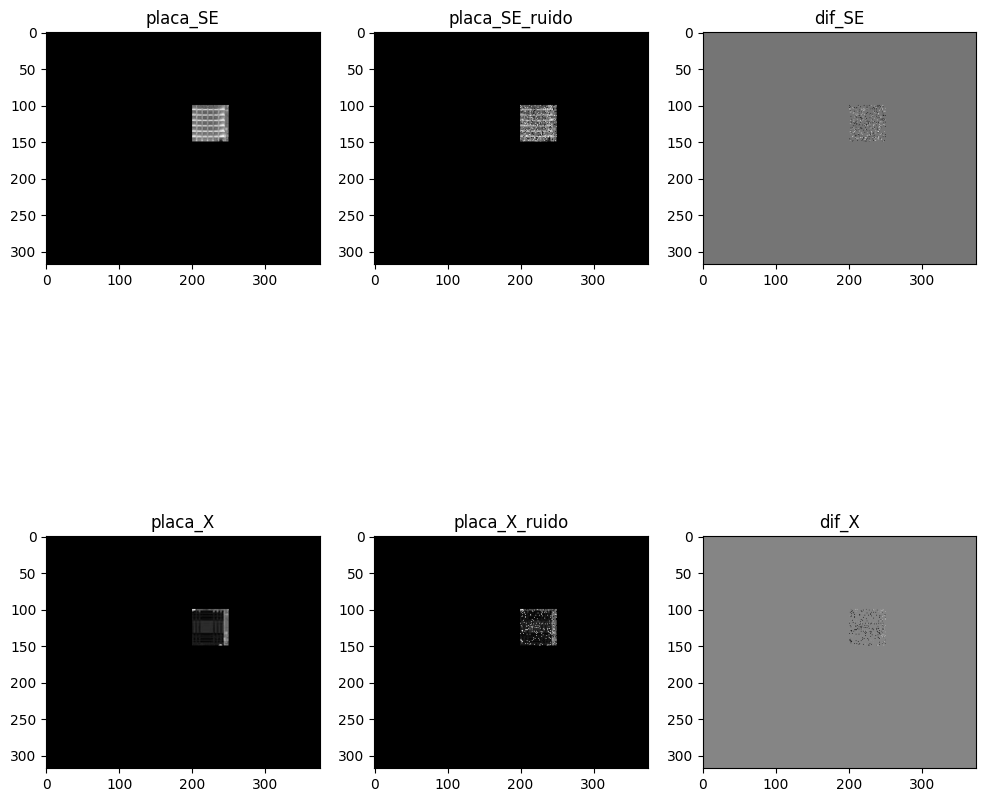

In [ ]:
#vemos que encontramos una diferencia notable de arquitectura en el
# roi = x entre(100,150) e y entre (200,250)
#podemos recortar esa parte para diferenciar las placas

placa_X_ruido_roi = multiplicacion_imagen(placa_X_ruido,mask)
placa_SE_roi = multiplicacion_imagen(placa_SE,mask)
placa_SE_ruido_roi = multiplicacion_imagen(placa_SE_ruido,mask)
placa_X_roi = multiplicacion_imagen(placa_X,mask)

dif_SE_roi = cv2.subtract(placa_SE_roi,placa_SE_ruido_roi)
print('error_cuadratico', np.sum(dif_SE_roi**2))
print('error_cuadratico_medio' ,np.mean(dif_SE_roi**2))
dif_X_roi = cv2.subtract(placa_X_roi,placa_X_ruido_roi)
print('error_cuadratico', np.sum(dif_X_roi**2))
print('error_cuadratico_medio' ,np.mean(dif_X_roi**2))
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,12))
ax[0,0].imshow(placa_SE_roi,cmap='gray'); ax[0,0].set_title("placa_SE")
ax[0,1].imshow(placa_SE_ruido_roi,cmap='gray'); ax[0,1].set_title("placa_SE_ruido")
ax[0,2].imshow(dif_SE_roi,cmap='gray'); ax[0,2].set_title("dif_SE")
ax[1,0].imshow(placa_X_roi,cmap='gray'); ax[1,0].set_title("placa_X")
ax[1,1].imshow(placa_X_ruido_roi,cmap='gray'); ax[1,1].set_title("placa_X_ruido")
ax[1,2].imshow(dif_X_roi,cmap='gray'); ax[1,2].set_title("dif_X")


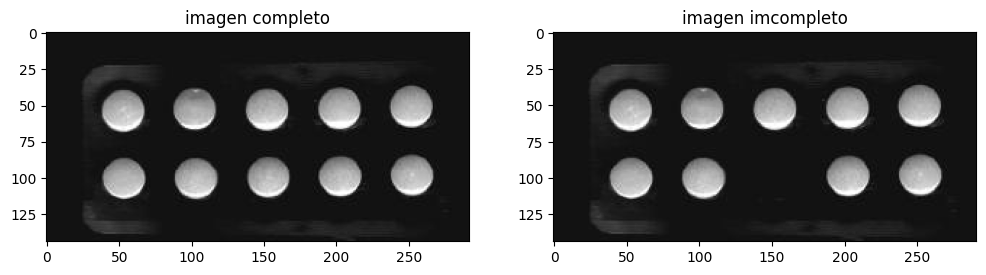

In [ ]:
# EJERCICIO 4.3
blister_completo = cv2.imread('blister_completo.jpg',cv2.IMREAD_GRAYSCALE)
blister_incompleto = cv2.imread('blister_incompleto.jpg',cv2.IMREAD_GRAYSCALE)

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,12))

ax[0].imshow(blister_completo,cmap='gray')
ax[0].set_title('imagen completo')
ax[1].imshow(blister_incompleto,cmap='gray')
ax[1].set_title('imagen imcompleto')
plt.show()

In [ ]:
def buscar_faltante(img):
    faltantes = []
    # defino una grilla -> imagen en "grilla.png"
    puntos_y = [25,75,125]
    puntos_x = [25,75,125,175,225,275]
    # defino un tono de intensidad promedio -> si esta por debajo entonces hay un faltante
    intensidad_max = 110
    for i in range(len(puntos_y)-1):
        for j in range(len(puntos_x)-1):
            print('promedio ',np.mean(img[puntos_y[i]:puntos_y[i+1],puntos_x[j]:puntos_x[j+1]]))
            if np.mean(img[puntos_y[i]:puntos_y[i+1],puntos_x[j]:puntos_x[j+1]]) < intensidad_max:
                faltantes.append([puntos_y[i],puntos_x[j]])
    return faltantes


In [ ]:
def revisar_blister(img):
    img_completa = cv2.imread('blister_completo.jpg',cv2.IMREAD_GRAYSCALE)
    if img.shape != img_completa.shape:
        img_completa = cv2.resize(blister_completo, img.shape[::-1])

    tramos_v = [np.arange(0,100),np.arange(100,256)]
    a_v = [0,1]
    c_v = [0,0]
    lut = make_lut_tramos(a_v,c_v,tramos_v)

    img_completa_lut = cv2.LUT(img_completa, lut)
    img_lut = cv2.LUT(img, lut)

    img_dif = diferencia_imagenes(0,img_lut,img_completa_lut)
    faltantes = buscar_faltante(img_dif)

    fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(12,12))
    ax[0].imshow(img_completa_lut,cmap='gray')
    ax[0].set_title('imagen completo')
    ax[1].imshow(img_lut,cmap='gray')
    ax[1].set_title('imagen imcompleto')
    ax[2].imshow(img_dif,cmap='gray')
    ax[2].set_title('diferencia imagen')
    if len(faltantes) > 0:
        print('faltantes en los puntos: ',faltantes)
        for faltante in faltantes:
            ax[2].plot([faltante[1],faltante[1]+50],[faltante[0],faltante[0]],'-b')
            ax[2].plot([faltante[1],faltante[1]],[faltante[0],faltante[0]+50],'-b')
            ax[2].plot([faltante[1]+50,faltante[1]+50],[faltante[0],faltante[0]+50],'-b')
            ax[2].plot([faltante[1],faltante[1]+50],[faltante[0]+50,faltante[0]+50],'-b')
    else:
        print('No hay faltantes')
    plt.show()

promedio  116.9176
promedio  116.9696
promedio  114.8432
promedio  114.382
promedio  111.9256
promedio  120.19
promedio  114.4472
promedio  105.32
promedio  114.9928
promedio  113.8276
faltantes en los puntos:  [[75, 125]]


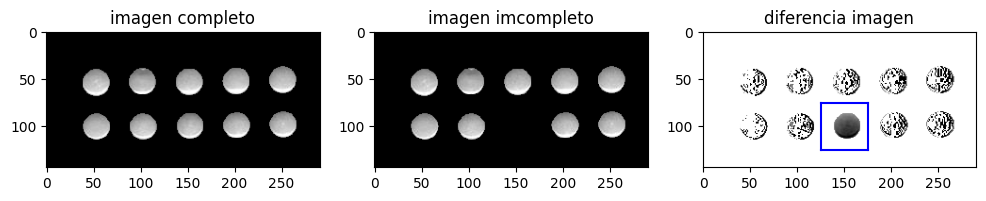

In [ ]:
blister_incompleto = cv2.imread('blister_incompleto.jpg',cv2.IMREAD_GRAYSCALE)
revisar_blister(blister_incompleto)

In [ ]:
# EJERCICIO 4.4